## Машинное обучение 1, ПМИ ФКН ВШЭ


## Табличные данные и Pandas 

In [339]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [340]:
!wget  -O 'end_seminar.xlsx' -q 'https://www.dropbox.com/scl/fi/2ezfw6b3y1umremflbgdl/end_seminar.xlsx?rlkey=xzecol82ybnpu0eon0b1s11pp&st=f45sugvp&dl=0'

In [343]:
df = pd.read_excel('end_seminar.xlsx')
df.tail(3)

,timestamp,id,rating,group_22,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,group_21,blended,is_ml_student
426,2024-08-19 11:49:43.000,77b2b19d26b7f160c1938369197f7cac590b2e0cfcac3b...,1232,NaN,NaN,Принятие решений в условиях риска и неопределе...,Основы разработки компьютерных игр,Введение в платформы данных,Теория и практика онлайн-экспериментов,Конфликты и кооперация (преподается на английс...,Децентрализованные системы,Да,0.440252,212.0,Соревновательный анализ данных,NaN
427,2024-08-13 14:58:30.000,6dafd9a56d08aeb419166d314b0cd6f3107ae5e8dbd636...,961,NaN,NaN,Основы информационного поиска,Дизайн систем,Язык программирования Scala,Промышленное программирование на Haskell,Методы сжатия и передачи медиаданных,Децентрализованные системы,Да,0.858491,215.0,Безопасность систем на базе LLM,NaN
428,2024-08-13 18:35:25.235,4bf710d7b89064e1a3cbcc69b7ca67c20d6181dc72ad35...,1374,NaN,NaN,Трансформерные и мультимодальные модели,Глубинное обучение для текстовых данных,Self-supervised Learning,Обучение с подкреплением,Современные языковые модели,Развёртывание ML-моделей в высоконагруженных с...,Да,0.169811,217.0,Продуктовый подход к анализу данных,NaN


Сколько было уникальных пользователей из групп 22-го года набора, а сколько из групп 21-го года?

In [344]:
unique_21 = df[df['group_21'].notna()]['id'].nunique()
unique_22 = df[df['group_22'].notna()]['id'].nunique()
print(unique_22, unique_21)

259 159


Есть ли уникальные студенты с равными перцентилями?

In [345]:
same_percentile = df.groupby('percentile')['id'].nunique()
same_percentile[same_percentile > 1]

,id
percentile,
0.000000,2
0.035185,2
0.053459,2
0.081481,3
0.105556,2
...,...
0.927778,2
0.944444,2
0.953704,2


Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [346]:
df.isna().sum()

,0
timestamp,0
id,0
rating,0
group_22,159
is_mi,403
fall_1,0
fall_2,0
fall_3,0
spring_1,48
spring_2,48


Заполним пропуски пустой строкой для строковых колонок, нулём для числовых и False для булевых.

In [347]:
df['is_ml_student'] = df['is_ml_student'].fillna(0).astype('bool')
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').fillna('')
df[df.select_dtypes(include=['int64', 'float64']).columns] = df.select_dtypes(include=['int64', 'float64']).fillna(0)

Колонка 'is_first_time'.

In [348]:
df.groupby('is_first_time').size() / len(df) * 100

,0
is_first_time,
Да,94.871795
Нет,5.128205


In [349]:
len(df[df.is_first_time == 'Нет'])

22

In [350]:
df = df.sort_values(by=['id', 'timestamp']).groupby('id').tail(1).reset_index(drop = True)
df = df.drop(columns=['is_mi'])

Какие  blended-курсы для четверокурсников существуют? 

На какой blended-курс записалось наибольшее количество студентов? 

На каком из blended-курсов собрались студенты с самым высоким средним рейтингом (выведите этот курс и количество студентов на нем)?

In [351]:
all_blended = df[df['blended'] != '']['blended'].value_counts()
print(all_blended)

most_blended = all_blended.idxmax()
students_most_blended = all_blended.max()
print(f"На курс {most_blended.lower()} записалось {students_most_blended} студентов.")

best_blended = df.groupby('blended')['rating'].mean().idxmax()
students_best_blended = df[df['blended'] == best_blended].shape[0]
print(f"На курсе {best_blended.lower()} {students_best_blended} студентов с самым высоким средним рейтингом.")

blended
Протоколы доказательств с нулевым разглашением    44
ML System Design                                  38
Соревновательный анализ данных                    26
Продуктовый подход к анализу данных               25
Безопасность систем на базе LLM                   13
Введение в дифференциальную геометрию             13
Name: count, dtype: int64
На курс протоколы доказательств с нулевым разглашением записалось 44 студентов.
На курсе продуктовый подход к анализу данных 25 студентов с самым высоким средним рейтингом.


Есть ли студенты с абсолютно одинаковыми предпочтениями по всем курсам.

In [352]:
courses = ['fall_1', 'fall_2', 'fall_3',
               'spring_1', 'spring_2', 'spring_3', 'blended']

courses = df.groupby(courses).size().reset_index(name='number_of_students')

courses[courses['number_of_students'] > 1]


,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,blended,number_of_students
13,Statistical Learning Theory,Основы информационного поиска,Язык SQL,Дополнительные главы машинного обучения,Машинное обучение в прикладных задачах,Аналитика данных,,2
60,Безопасность компьютерных систем,Основы разработки компьютерных игр,Язык SQL,Компьютерные сети,Компьютерные сети,Компьютерные сети,,2
134,Дизайн систем,Безопасность компьютерных систем,Основы разработки компьютерных игр,Децентрализованные системы,Методы сжатия и передачи медиаданных,Теория и практика онлайн-экспериментов,Протоколы доказательств с нулевым разглашением,2
135,Дизайн систем,Безопасность компьютерных систем,Основы разработки компьютерных игр,Децентрализованные системы,Промышленное программирование на Haskell,Обучение с подкреплением,Протоколы доказательств с нулевым разглашением,2
142,Дизайн систем,Операционные системы 2,Основы информационного поиска,Промышленное программирование на Haskell,Децентрализованные системы,Методы сжатия и передачи медиаданных,Протоколы доказательств с нулевым разглашением,2
282,Системы баз данных,Операционные системы 2,Безопасность компьютерных систем,,,,,2
288,Системы баз данных,Операционные системы 2,Разработка микросервисов на Go,,,,,2
290,Системы баз данных,Операционные системы 2,Разработка микросервисов на Go,Компьютерные сети,Компьютерные сети,Компьютерные сети,,2
293,Системы баз данных,Операционные системы 2,Функциональное программирование,,,,,2
309,Системы баз данных,Разработка микросервисов на Go,Операционные системы 2,Компьютерные сети,Промышленное программирование на языке Java,Машинное обучение 2,,2


Курсы по выбору, на которые записывались как студенты 22-го года набора, так и студенты 21-го года.

In [353]:
all_courses = ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']

courses_21 = set(df[df['group_21'] != 0][all_courses].values.ravel())
courses_22 = set(df[df['group_22'] != 0][all_courses].values.ravel())

courses_21 & courses_22

{'Statistical Learning Theory',
 'Безопасность компьютерных систем',
 'Введение в платформы данных',
 'Интегральные уравнения в задачах математического моделирования',
 'Математические основы нейросетевых моделей',
 'Операционные системы 2',
 'Основы информационного поиска',
 'Основы разработки компьютерных игр',
 'Основы тензорных вычислений',
 'Принятие решений в условиях риска и неопределенности',
 'Специальные разделы матричного анализа',
 'Стохастический анализ',
 'Типы в языках программирования',
 'Язык программирования Scala'}

Курсы, которые предлагались только студентам 22-го года и только студентам 21-го года.

In [369]:
#только 21 год
courses_21 - courses_22

{'ML System Design',
 'Self-supervised Learning',
 'Байесовские методы в машинном обучении',
 'Безопасность систем на базе LLM',
 'Введение в дифференциальную геометрию',
 'Генеративные модели в машинном обучении',
 'Генеративные модели на основе диффузии',
 'Генеративные модели на основе диффузии / Diffusion-Based Generative Models',
 'Глубинное обучение в анализе графовых данных',
 'Глубинное обучение в обработке звука',
 'Глубинное обучение для текстовых данных',
 'Децентрализованные системы',
 'Дизайн систем',
 'Конфликты и кооперация (преподается на английском языке)',
 'Методы сжатия и передачи медиаданных',
 'Обучение с подкреплением',
 'Продуктовый подход к анализу данных',
 'Промышленное программирование на Haskell',
 'Протоколы доказательств с нулевым разглашением',
 'Развёртывание ML-моделей в высоконагруженных системах',
 'Символьные вычисления',
 'Современные языковые модели',
 'Соревновательный анализ данных',
 'Теория и практика онлайн-экспериментов',
 'Теория сложных си

In [354]:
#только 22 год
courses_22 - courses_21

{'',
 'Go от шада',
 'Аналитика данных',
 'Генеративные модели в машинном обучении (углубленный курс)',
 'Глубинное обучение в естественных науках',
 'Дополнительные главы машинного обучения',
 'Количественные финансы',
 'Комбинаторная оптимизация',
 'Компьютерные сети',
 'Лингвистика для программистов',
 'Машинное обучение 2',
 'Машинное обучение в прикладных задачах',
 'Моделирование временных рядов',
 'Прикладная статистика в машинном обучении',
 'Промышленное программирование на языке Java',
 'Разработка микросервисов на Go',
 'Распределенные системы',
 'Рекомендательные системы',
 'Системы баз данных',
 'Топологический анализ данных',
 'Функциональное программирование',
 'ШАД RL',
 'Шадовский Go',
 'Язык SQL',
 'Язык программирования Go'}

Go от шада и шадовский Go у 22 года, генеративные модели на основе диффузии и генеративные модели на основе диффузии / Diffusion-Based Generative models, предположительно, имеются в виду одни и те же курсы

### Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. Здесь будут описаны ключевые правила оформления графиков для **всех** домашних заданий.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить один из них. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать;
- если распределение на гистограмме имеет тяжёлые хвосты, лучше использовать логарифмическую шкалу.

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) (обычно сокращается до sns). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

**5 пунктов после которых ваши графики не будут прежними:**
- для красивой картинки <code>%config InlineBackend.figure_format = 'retina'</code>
- задаем размер (почти) всех графиков (можно выбрать другие значения) <code>plt.rcParams['figure.figsize'] = 8, 5</code>
- размер шрифта подписей графиков <code>plt.rcParams['font.size'] = 12</code>
- формат в котором сохраняется изображение <code>mpl.rcParams['savefig.format'] = 'pdf'</code>
- sns – seaborn, добавляет решетку <code>sns.set_style('darkgrid')</code>

Добавьте эти функции в ячейку ниже. Каждый график все равно придется настраивать отдельно, но указанные строчки позволят значительно упростить процесс.  

In [355]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
mpl.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

График средних рейтингов по дням получения ответов (bar plot).

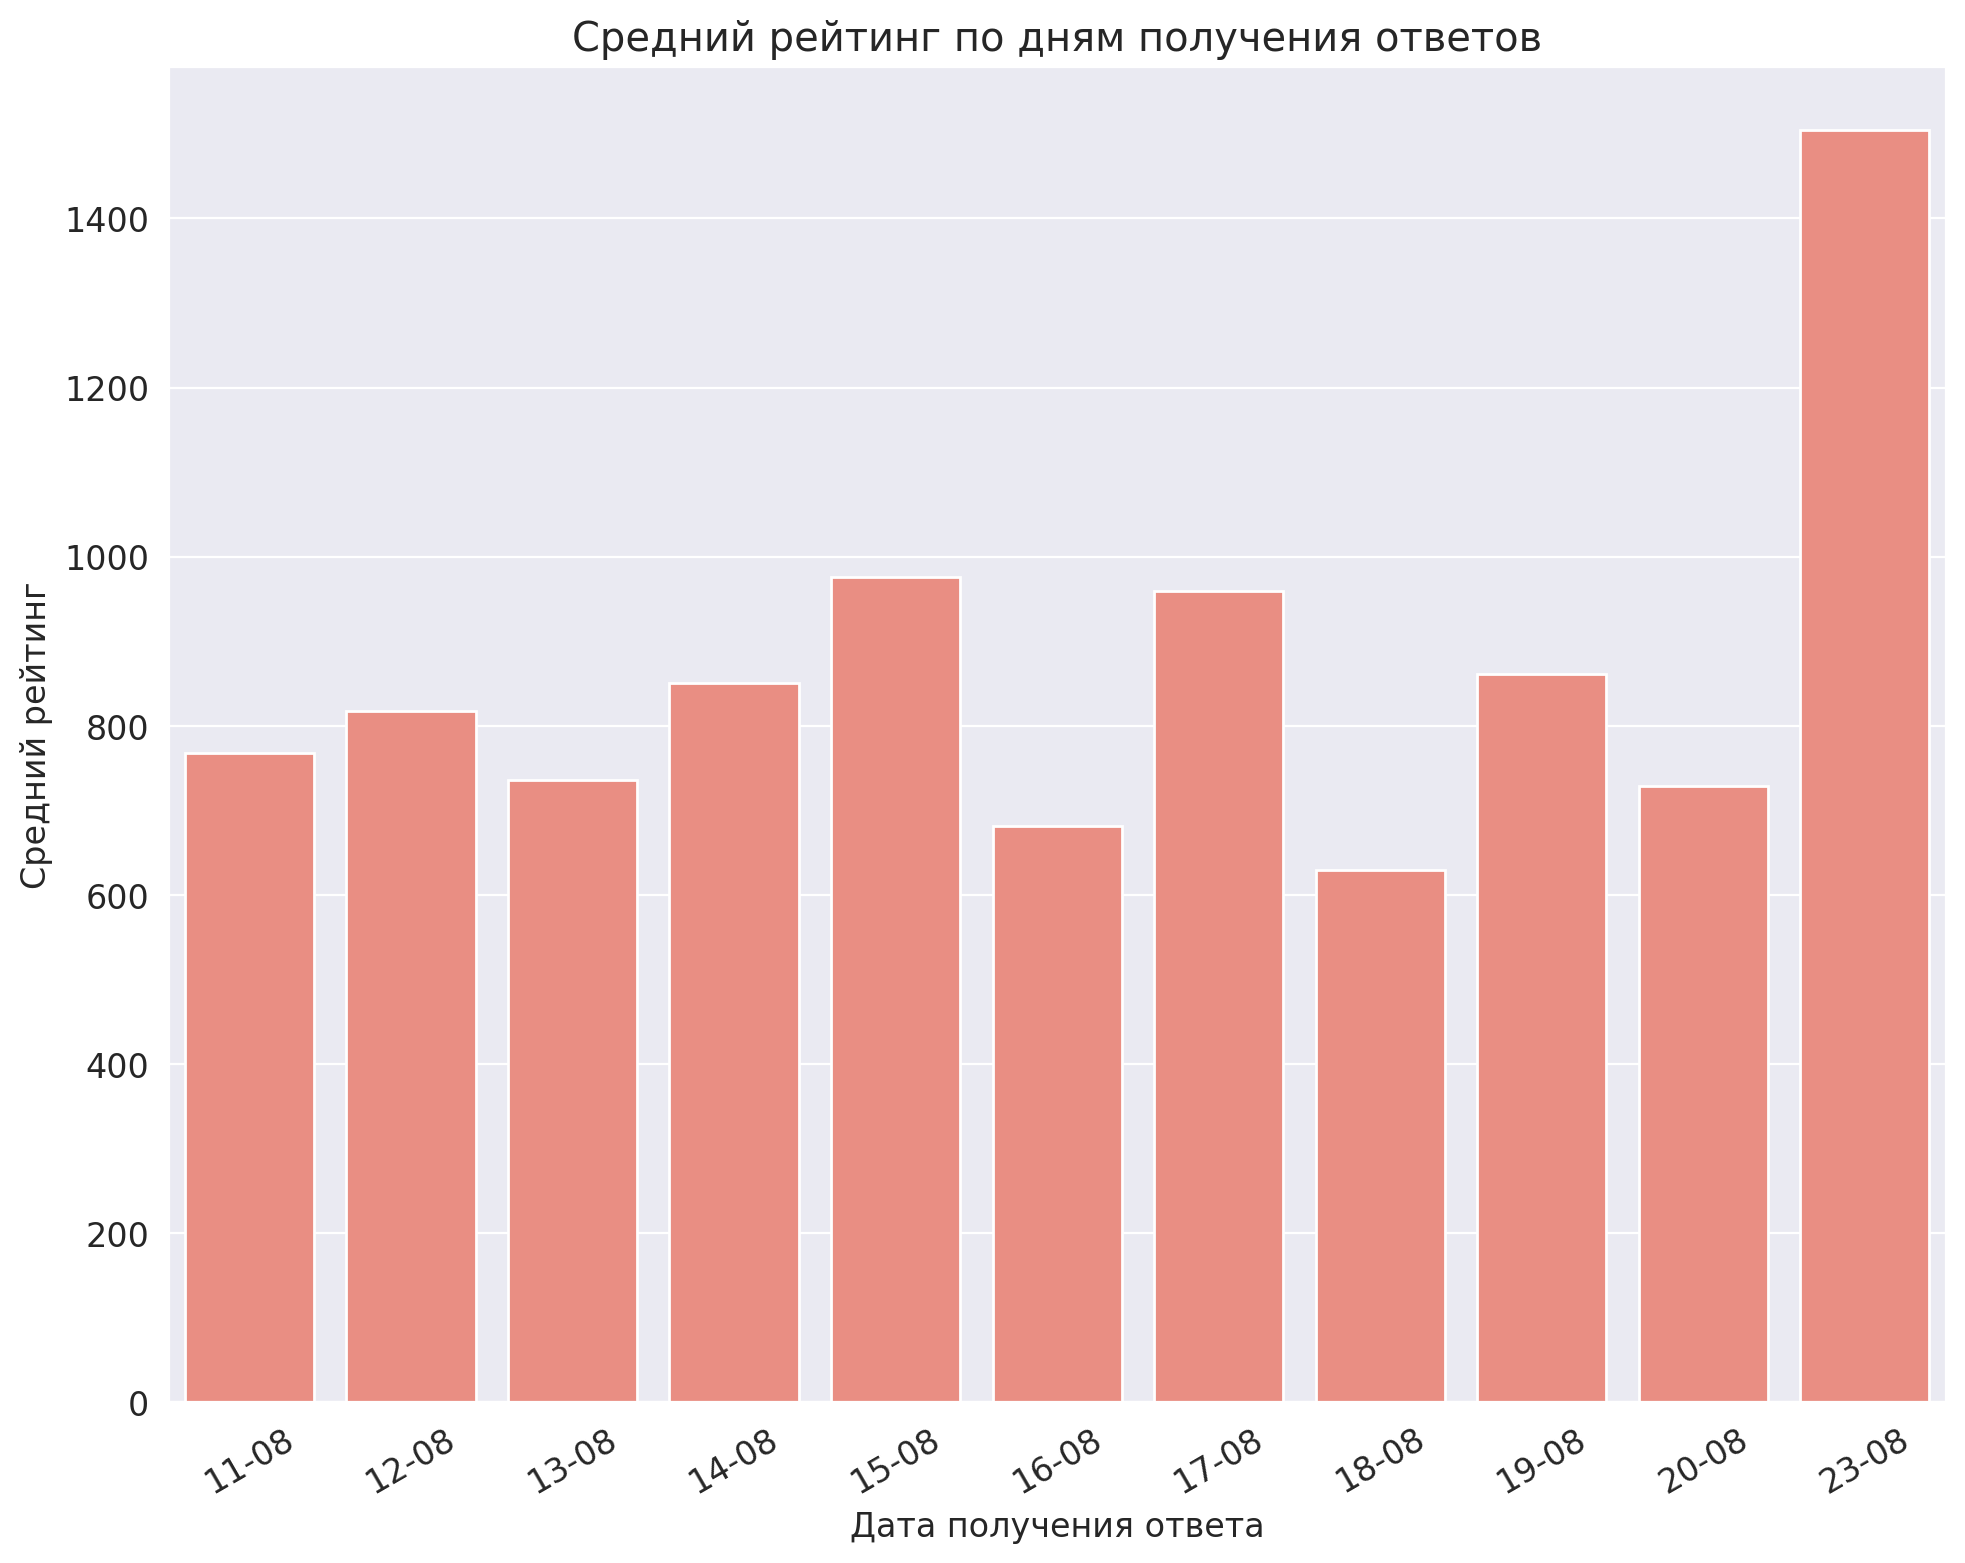

In [356]:
average_by_date = df.groupby(df['timestamp'].dt.strftime('%d-%m'))['rating'].mean().reset_index()

plt.figure(figsize=(10,8))
sns.barplot(average_by_date, x='timestamp', y='rating', color='salmon')
plt.title('Средний рейтинг по дням получения ответов')
plt.xlabel('Дата получения ответа')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=30)
plt.savefig('average_rating.pdf')
plt.tight_layout()

# Распределение студентов по курсам. 

## 📌 **Алгоритм распределения студентов по курсам**:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом, и места заполняются лучшими по перцентили рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

- Конкурс на каждый курс общий для 3-го и 4-го курса

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 21-го года специализаций МОП выбирают по 2 осенних и 2 весенних курса по выбору. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. **Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются.** Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо.

- Заведомо известно, что в процессе распределения не возникнет ситуации, когда на одно место претендуют студенты с одинаковым перцентилем.

- На выходе файл `res_fall.csv` с результатами распределения на осенние курсы по выбору. Файл следующего формата:

    * три столбца: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"

    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.

- Результаты опроса: https://www.dropbox.com/scl/fi/2ezfw6b3y1umremflbgdl/end_seminar.xlsx?rlkey=xzecol82ybnpu0eon0b1s11pp&st=f45sugvp&dl=0)

- Соответствие номеров групп специализациям:

    * 211, 212, 213 - МОП; остальные - не МОП! 👎
    
    * У студентов 22-го года номера групп соответствуют номерам до распределения по специализациям. Это означает, что по номеру группы 22* нельзя однозначно определить специализацию студента. При этом в рамках распределения важно знать информацию только о МОП. Эти знание можно получить из колонки `is_ml_student`.

- Ограничения по количеству мест на курсах по выбору:

    * Количественные финансы - 60
    * Промышленное программирование на Haskell - 60
    * Рекомендательные системы - 60
    * Глубинное обучение в обработке звука - 1000 (да да, не удивляйтесь! раньше и не такое было...)
    * Остальные курсы - 30

Создам новый признак, обозначающий, сколько осенних курсов должен выбрать студент

In [358]:
df['MOP'] = df.apply(lambda row: 2 if row['group_21'] in [211, 212, 213] or row['is_ml_student'] == True else 1, axis=1)
df['num_courses'] = 1
df.loc[df['group_21'].isin([211, 212, 213]), 'num_courses'] = 2

#### Распределение студентов в соответствии с первым приоритетом

In [360]:
limit = {'Количественные финансы': 60,
    'Промышленное программирование на Haskell': 60,
    'Рекомендательные системы': 60,
    'Глубинное обучение в обработке звука': 1000}

In [361]:
df22 = df[['id', 'fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'percentile', 'num_courses', 'MOP']].assign(course1='', course2='',ready='')

In [362]:
df22

,id,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,percentile,num_courses,MOP,course1,course2,ready
0,0059ff585d5dd682c681c52e0bffb9d0c2a259d2a3f71c...,Системы баз данных,Системы баз данных,Системы баз данных,Компьютерные сети,Компьютерные сети,Компьютерные сети,0.701852,1,1,,,
1,01d7c005dacd8c0be29bae8672b92be43c8cd0bd5b0af9...,Глубинное обучение в обработке звука,Self-supervised Learning,Глубинное обучение для текстовых данных,Обучение с подкреплением,Теория и практика онлайн-экспериментов,Математические основы нейросетевых моделей,0.754717,2,2,,,
2,01f548f29a80a6f35b8ce1bdfdf723e2ba70a9c074c2f9...,Statistical Learning Theory,Распределенные системы,Основы тензорных вычислений,Стохастический анализ,Специальные разделы матричного анализа,Математические основы нейросетевых моделей,0.774074,1,2,,,
3,027ed85baa13164987f5c30f6e4bdcb9c8f6566ca2d09d...,Разработка микросервисов на Go,Безопасность компьютерных систем,Основы информационного поиска,Аналитика данных,Машинное обучение в прикладных задачах,Дополнительные главы машинного обучения,0.250000,1,1,,,
4,0371f1e9746b55e981d200dbc94929d95e6629295cbe43...,Распределенные системы,Statistical Learning Theory,Разработка микросервисов на Go,,,,0.631481,1,1,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,fd9e56667275c376fd4349cbc7d049bf77d0602a6b3aac...,Язык SQL,Statistical Learning Theory,Основы тензорных вычислений,Генеративные модели в машинном обучении (углуб...,Машинное обучение в прикладных задачах,Стохастический анализ,0.353704,1,2,,,
414,fe90aa7a0896204cfb47d3fa8c5ee079a22a1f900b6755...,Statistical Learning Theory,Основы информационного поиска,Язык SQL,Дополнительные главы машинного обучения,Машинное обучение в прикладных задачах,Аналитика данных,0.587037,1,2,,,
415,ff2b57429d0d45788e2e22cf0c13fe152ef7a8e41f480f...,Операционные системы 2,Дизайн систем,Безопасность компьютерных систем,Развёртывание ML-моделей в высоконагруженных с...,Децентрализованные системы,Промышленное программирование на Haskell,0.955975,1,1,,,
416,ffe30e6b61eb3a819223305e77c276da9c373aa4a8763f...,Безопасность компьютерных систем,Прикладная статистика в машинном обучении,Основы информационного поиска,,,,0.244444,1,1,,,


In [363]:
def assign_courses_colab_group_ranking(df22):
    season = input("Введите сезон (fall или spring): ").strip().lower()
    while season not in ['fall', 'spring']:
        print("Ошибка: введите 'fall' или 'spring'")
        season = input("Введите сезон (fall или spring): ").strip().lower()

    num_passes = int(input("Введите количество проходов (1, 2 или 3): "))
    while num_passes not in [1, 2, 3]:
        print("Ошибка: введите 1, 2 или 3")
        num_passes = int(input("Введите количество проходов (1, 2 или 3): "))

    result_df = df22.copy()
    result_df['course1'] = '-'
    result_df['course2'] = '-'
    result_df['ready'] = ''

    limits = {'Количественные финансы': 60,
        'Промышленное программирование на Haskell': 60,
        'Рекомендательные системы': 60,
        'Глубинное обучение в обработке звука': 1000,
        'Машинное обучение 2': 30}
    default_limit = 30

    all_courses = set()
    for i in [1, 2, 3]:
        col_name = f"{season}_{i}"
        if col_name in result_df.columns:
            unique_courses = set(result_df[col_name].unique())
            all_courses.update(unique_courses)

    full_limits = limits.copy()
    for course in all_courses:
        if course not in full_limits:
            full_limits[course] = default_limit

    course_counters = {course: 0 for course in full_limits.keys()}

    for n in range(1, num_passes + 1):
        active_mask = result_df['ready'] != '+'
        active_indices = result_df[active_mask].index

        if len(active_indices) == 0:
            break

        applications_by_course = {course: [] for course in full_limits.keys()}

        for idx in active_indices:
            student = result_df.loc[idx]
            student_id = student['id']
            num_courses = student['num_courses']
            percentile = student['percentile']
            mop = student.get('MOP', 1)

            if num_courses == 1:
                course_col = f"{season}_{n}"
                course_value = student[course_col]
                if course_value in applications_by_course:
                    applications_by_course[course_value].append({
                        'idx': idx,
                        'id': student_id,
                        'percentile': percentile,
                        'num_courses': num_courses,
                        'course_type': 'course1',
                        'mop': mop})

            elif num_courses == 2:
                if n == 1:
                    for i in [1, 2]:
                        course_col = f"{season}_{i}"
                        course_value = student[course_col]
                        course_type = 'course1' if i == 1 else 'course2'

                        if mop == 2 and course_value == 'Машинное обучение 2':
                            if i == 1:
                                course_col = f"{season}_2"
                                course_value = student[course_col]
                            elif i == 2:
                                course_col = f"{season}_1"
                                course_value = student[course_col]

                        if course_value in applications_by_course:
                            applications_by_course[course_value].append({
                                'idx': idx,
                                'id': student_id,
                                'percentile': percentile,
                                'num_courses': num_courses,
                                'course_type': course_type,
                                'mop': mop})

                elif n == 2:
                    course_col = f"{season}_3"
                    course_value = student[course_col]

                    if mop == 2 and course_value == 'Машинное обучение 2':
                        course1_val = result_df.at[idx, 'course1']
                        course2_val = result_df.at[idx, 'course2']

                        if course1_val == '-' and course2_val == '-':
                            for i in [1, 2]:
                                alt_course_col = f"{season}_{i}"
                                alt_course_value = student[alt_course_col]
                                course_type = 'course1' if i == 1 else 'course2'

                                if alt_course_value in applications_by_course:
                                    applications_by_course[alt_course_value].append({
                                        'idx': idx,
                                        'id': student_id,
                                        'percentile': percentile,
                                        'num_courses': num_courses,
                                        'course_type': course_type,
                                        'mop': mop})
                        elif course1_val == '-':
                            alt_course_col = f"{season}_2"
                            alt_course_value = student[alt_course_col]
                            course_type = 'course1'

                            if alt_course_value in applications_by_course:
                                applications_by_course[alt_course_value].append({
                                    'idx': idx,
                                    'id': student_id,
                                    'percentile': percentile,
                                    'num_courses': num_courses,
                                    'course_type': course_type,
                                    'mop': mop})
                        elif course2_val == '-':
                            alt_course_col = f"{season}_1"
                            alt_course_value = student[alt_course_col]
                            course_type = 'course2'

                            if alt_course_value in applications_by_course:
                                applications_by_course[alt_course_value].append({
                                    'idx': idx,
                                    'id': student_id,
                                    'percentile': percentile,
                                    'num_courses': num_courses,
                                    'course_type': course_type,
                                    'mop': mop})
                    else:
                        course1_val = result_df.at[idx, 'course1']
                        course2_val = result_df.at[idx, 'course2']

                        if course1_val == '-' and course2_val == '-':
                            course_type = 'course1'
                        elif course1_val == '-':
                            course_type = 'course1'
                        elif course2_val == '-':
                            course_type = 'course2'
                        else:
                            continue

                        if course_value in applications_by_course:
                            applications_by_course[course_value].append({
                                'idx': idx,
                                'id': student_id,
                                'percentile': percentile,
                                'num_courses': num_courses,
                                'course_type': course_type,
                                'mop': mop})

        for course_name, applications in applications_by_course.items():
            if not applications:
                continue

            applications.sort(key=lambda x: x['percentile'])

            course_limit = full_limits[course_name]
            available_slots = course_limit - course_counters[course_name]

            if available_slots <= 0:
                continue

            selected = []
            selected_ids = set()

            for app in applications:
                if len(selected) >= available_slots:
                    break
                if app['id'] not in selected_ids:
                    selected.append(app)
                    selected_ids.add(app['id'])

            for app in selected:
                idx = app['idx']
                course_type = app['course_type']


                if result_df.at[idx, course_type] in ['-', '???']:
                    result_df.at[idx, course_type] = course_name
                    course_counters[course_name] += 1


        ready_updates = 0
        for idx in result_df.index:
            if result_df.at[idx, 'ready'] != '+':
                num_courses = result_df.at[idx, 'num_courses']
                course1 = result_df.at[idx, 'course1']
                course2 = result_df.at[idx, 'course2']

                if num_courses == 1:
                    if course1 != '-' and course1 != '???':
                        result_df.at[idx, 'ready'] = '+'
                        ready_updates += 1
                elif num_courses == 2:
                    if (course1 != '-' and course1 != '???' and
                        course2 != '-' and course2 != '???'):
                        result_df.at[idx, 'ready'] = '+'
                        ready_updates += 1

    for idx in result_df.index:
        num_courses = result_df.at[idx, 'num_courses']
        course1 = result_df.at[idx, 'course1']
        course2 = result_df.at[idx, 'course2']

        if num_courses == 1 and course1 == '-':
            result_df.at[idx, 'course1'] = '???'
        elif num_courses == 2:
            if course1 == '-':
                result_df.at[idx, 'course1'] = '???'
            if course2 == '-':
                result_df.at[idx, 'course2'] = '???'

    final_result = result_df[['id', 'course1', 'course2']]

    output_filename = f'course_assignment_{season}_group_ranking.csv'
    final_result.to_csv(output_filename, index=False)

    return final_result

#fall, 1 и красиво будет
first_result = assign_courses_colab_group_ranking(df22)
first_result

Введите сезон (fall или spring): fall
Введите количество проходов (1, 2 или 3): 1


,id,course1,course2
0,0059ff585d5dd682c681c52e0bffb9d0c2a259d2a3f71c...,???,-
1,01d7c005dacd8c0be29bae8672b92be43c8cd0bd5b0af9...,Глубинное обучение в обработке звука,Self-supervised Learning
2,01f548f29a80a6f35b8ce1bdfdf723e2ba70a9c074c2f9...,Statistical Learning Theory,-
3,027ed85baa13164987f5c30f6e4bdcb9c8f6566ca2d09d...,Разработка микросервисов на Go,-
4,0371f1e9746b55e981d200dbc94929d95e6629295cbe43...,Распределенные системы,-
...,...,...,...
413,fd9e56667275c376fd4349cbc7d049bf77d0602a6b3aac...,Язык SQL,-
414,fe90aa7a0896204cfb47d3fa8c5ee079a22a1f900b6755...,Statistical Learning Theory,-
415,ff2b57429d0d45788e2e22cf0c13fe152ef7a8e41f480f...,Операционные системы 2,-
416,ffe30e6b61eb3a819223305e77c276da9c373aa4a8763f...,Безопасность компьютерных систем,-


Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [364]:
!wget  -O '2_task_check.csv' -q 'https://www.dropbox.com/scl/fi/ixodhpl9xxhdb6a9fqglm/2_task_check.csv?rlkey=53c6ea92rkrz2057tfv7trdxo&st=13lp5ley&dl=0'
check_df = pd.read_csv('2_task_check.csv')

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [365]:
df = df.merge(result_group_ranking[['id','course1','course2']], on='id', how='left')

In [366]:
min_percentiles = pd.concat([df.groupby('course1')['percentile'].min(),
        df.groupby('course2')['percentile'].min()])

max_percentiles = pd.concat([df.groupby('course1')['percentile'].max(),
        df.groupby('course2')['percentile'].max()])

df['is_first_place'] = df['percentile'].isin(min_percentiles.values).replace(False, np.nan)
df['is_last_place'] = df['percentile'].isin(max_percentiles.values).replace(False, np.nan)

In [367]:
'''fir_col_name = 'is_first_place'     # insert name of your new column with is_first_place as str
last_col_name = 'is_last_place'   # insert name of your new column with is_last_place as str


assert((df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
        ==
        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ).id.values).all()


assert((df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ==
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
      ).id.values).all()'''

"fir_col_name = 'is_first_place'     # insert name of your new column with is_first_place as str\nlast_col_name = 'is_last_place'   # insert name of your new column with is_last_place as str\n\n\nassert((df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)\n        ==\n        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)\n       ).id.values).all()\n\n\nassert((df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)\n       ==\n       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)\n      ).id.values).all()"

#### Проведение всех трех волн отбора студентов на курсы по выбору

In [331]:
final_result_fall = assign_courses_colab_group_ranking(df22)
final_result_fall
#fall, 3 еще лучше

Введите сезон (fall или spring): fall
Введите количество проходов (1, 2 или 3): 3


,id,course1,course2
0,0059ff585d5dd682c681c52e0bffb9d0c2a259d2a3f71c...,???,-
1,01d7c005dacd8c0be29bae8672b92be43c8cd0bd5b0af9...,Глубинное обучение в обработке звука,Self-supervised Learning
2,01f548f29a80a6f35b8ce1bdfdf723e2ba70a9c074c2f9...,Statistical Learning Theory,-
3,027ed85baa13164987f5c30f6e4bdcb9c8f6566ca2d09d...,Разработка микросервисов на Go,-
4,0371f1e9746b55e981d200dbc94929d95e6629295cbe43...,Распределенные системы,-
...,...,...,...
413,fd9e56667275c376fd4349cbc7d049bf77d0602a6b3aac...,Язык SQL,-
414,fe90aa7a0896204cfb47d3fa8c5ee079a22a1f900b6755...,Statistical Learning Theory,-
415,ff2b57429d0d45788e2e22cf0c13fe152ef7a8e41f480f...,Операционные системы 2,-
416,ffe30e6b61eb3a819223305e77c276da9c373aa4a8763f...,Безопасность компьютерных систем,-


In [332]:
final_result_fall.to_csv('res_fall.csv', index=None)

### Распределение таким же образом студентов на весенние курсы по выбору.

In [333]:
final_result_spring = assign_courses_colab_group_ranking(df22)
final_result_spring
#spring, 3

Введите сезон (fall или spring): spring
Введите количество проходов (1, 2 или 3): 3


,id,course1,course2
0,0059ff585d5dd682c681c52e0bffb9d0c2a259d2a3f71c...,???,-
1,01d7c005dacd8c0be29bae8672b92be43c8cd0bd5b0af9...,Математические основы нейросетевых моделей,Теория и практика онлайн-экспериментов
2,01f548f29a80a6f35b8ce1bdfdf723e2ba70a9c074c2f9...,Стохастический анализ,-
3,027ed85baa13164987f5c30f6e4bdcb9c8f6566ca2d09d...,Аналитика данных,-
4,0371f1e9746b55e981d200dbc94929d95e6629295cbe43...,???,-
...,...,...,...
413,fd9e56667275c376fd4349cbc7d049bf77d0602a6b3aac...,Генеративные модели в машинном обучении (углуб...,-
414,fe90aa7a0896204cfb47d3fa8c5ee079a22a1f900b6755...,Дополнительные главы машинного обучения,-
415,ff2b57429d0d45788e2e22cf0c13fe152ef7a8e41f480f...,Развёртывание ML-моделей в высоконагруженных с...,-
416,ffe30e6b61eb3a819223305e77c276da9c373aa4a8763f...,,-


In [334]:
final_result_spring.to_csv('res_spring.csv', index=None)

In [335]:
from IPython.display import Image
Image(url='https://i.pinimg.com/564x/3a/6d/04/3a6d04fdd0d7b536e95c9b178d6ab069.jpg')